In [1]:
import gdsfactory as gf
from die_frame import die_frame
from polish_ruler import polish_ruler
from dies import die_frame_mesa

gf.config.rich_output()

df = die_frame(
    size=(20000, 10000),
    dicing_width=55,
    polish_width=150,
    polish_sides=("E", "W"),
)

# c = die_frame_mesa(
#     die_frame=df,
#     polish_ruler=polish_ruler,
#     ruler_pos={"E": (0, 500), "W": (-300,)},
#     pad=gf.c.pad(size=(250,250)),
#     npads=50,
#     pad_pitch=350.0,
#     electrical_sides=("N", "S"),
#     xoffset_dc_pads=(-250.0, -250.0),
#     center_pads=True
    
# )

#c.show()

In [2]:
from couplers import edge_coupler_array
from couplers import edge_coupler_array_mesa_def
from polish_ruler import polish_ruler

# Build your arrays elsewhere, fully configured

fa_w1 = edge_coupler_array_mesa_def(
    widths=(0.75, 1, 1.25, 1.5),
)

fa_e2 = edge_coupler_array_mesa_def(
    widths=(0.75, 1, 1.25, 1.5),
    axis_reflection = True,
)

# fa_w1 = edge_coupler_array(
#     n=32, n_alignment_loops=2, axis="y", axis_reflection=False,
#     adhesive_keepout_layer="TE", adhesive_keepout_margin=(200, 80),
#     adhesive_keepout_axis="x", adhesive_keepout_positive=True,
# )
fa_w2 = edge_coupler_array(
    n=12, n_alignment_loops=1, axis="y", axis_reflection=False,
    adhesive_keepout_layer="TE", adhesive_keepout_margin=(200, 80),
    adhesive_keepout_axis="x", adhesive_keepout_positive=True,
)
fa_e1 = edge_coupler_array(
    n=32, n_alignment_loops=2, axis="y", axis_reflection=True,
    alignment_pairs={"0": 0, "1": 30},  # optional explicit adjacent pairs
    adhesive_keepout_layer="TE", adhesive_keepout_margin=(200, 80),
    adhesive_keepout_axis="x", adhesive_keepout_positive=True,
)

c = die_frame_mesa(
    die_frame=df,
    # multiple arrays per side:

    polish_ruler=polish_ruler,
    ruler_pos={"E": (-4450, 4450), "W": (-4450, 4450)},
    pad=gf.c.pad(size=(500,500)),
    npads=20,
    pad_pitch=750.0,
    electrical_sides=("N", "S"),
    xoffset_dc_pads=(-250.0, -250.0),
    center_pads=True,
    

    fiber_arrays_by_side={
        "W": [fa_w1],
        "E": [fa_e2],
        # "N": [...], "S": [...]
    },
    # offsets per side (tuple applies to all arrays on that side,
    # or give a list with one (along, normal) per array):
    fiber_offsets_by_side={
        "W": [(-2250.0, 0.0)],  # two arrays on W with different along shifts
        "E": (2250.0, 0.0),                    # one array on E
    },
    rename_fiber_ports=True,  # exports W01_*, W02_*, E01_* at top level
    
)
c.info

/home/sadilek/Dev/python-lab/.venv/lib/python3.12/site-packages/kfactory/decorators.py:413: UserWarning: `width` overrides `start_width`. Use only `start_width` going forward.
  cell = f(**params)  # type: ignore[call-arg]



Info(
    die_frame={
        'die_clean_size': (20000.0, 10000.0),
        'die_polished_bbox': (-10150.0, -5000.0, 10150.0, 5000.0),
        'die_step_size': (20355.0, 10055.0),
        'die_step_bbox': (-10177.5, -5027.5, 10177.5, 5027.5),
        'die_velist_size': (20355.0, 10055.0),
        'die_velist_bbox': (-10177.5, -5027.5, 10177.5, 5027.5),
        'polish_widths': {'E': 150.0, 'W': 150.0, 'N': 0.0, 'S': 0.0},
        'polish_sides': ['E', 'W'],
        'dicing_width': 55.0
    },
    polish_ruler={
        'pr_span_min': -100.0,
        'pr_span_max': 100.0,
        'pr_span_tuple': (100.0, -100.0),
        'pr_edge': 'Left',
        'pr_resolution': 5.0,
        'pr_main_div': 10,
        'pr_num_div': 2,
        'pr_height': 50.0,
        'pr_tick_width': 1.0,
        'pr_extra_center': True,
        'pr_bbox_enabled': True,
        'pr_bbox_frame': True,
        'pr_layer': 'WG',
        'pr_bbox_layer': 'FLOORPLAN',
        'pr_size_x': 219.0,
        'pr_size_y': 69.

In [3]:
d = gf.Component()

d.add_ref(c)

ports1=c.ports.filter(regex='^W01_(?!AL)\d+o2$')
ports2=c.ports.filter(regex='^E01_(?!AL)\d+o2$')

ports1


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_17648/1908513739.py:5: SyntaxWarning: invalid escape sequence '\d'
  ports1=c.ports.filter(regex='^W01_(?!AL)\d+o2$')
/tmp/ipykernel_17648/1908513739.py:6: SyntaxWarning: invalid escape sequence '\d'
  ports2=c.ports.filter(regex='^E01_(?!AL)\d+o2$')



[
    DPort(self.name='W01_1o2', self.width=0.75, trans=r0 *1 -9000,-3964.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='W01_2o2', self.width=1.0, trans=r0 *1 -9000,-3837.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='W01_3o2', self.width=1.25, trans=r0 *1 -9000,-3710.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='W01_4o2', self.width=1.5, trans=r0 *1 -9000,-3583.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='W01_5o2', self.width=0.75, trans=r0 *1 -9000,-3456.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='W01_6o2', self.width=1.0, trans=r0 *1 -9000,-3329.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='W01_7o2', self.width=1.25, trans=r0 *1 -9000,-3202.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='W01_8o2', self.width=1.5, trans=r0 *1 -9000,-3075.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='W01_9o2', self.width=0.75, trans=r0 *1 -9000,-2948.5, layer=WG (1/0), port_type=optical),
  

In [4]:
ports2


[
    DPort(self.name='E01_1o2', self.width=0.75, trans=r180 *1 9092,535.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='E01_2o2', self.width=1.0, trans=r180 *1 9092,662.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='E01_3o2', self.width=1.25, trans=r180 *1 9092,789.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='E01_4o2', self.width=1.5, trans=r180 *1 9092,916.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='E01_5o2', self.width=0.75, trans=r180 *1 9092,1043.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='E01_6o2', self.width=1.0, trans=r180 *1 9092,1170.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='E01_7o2', self.width=1.25, trans=r180 *1 9092,1297.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='E01_8o2', self.width=1.5, trans=r180 *1 9092,1424.5, layer=WG (1/0), port_type=optical),
    DPort(self.name='E01_9o2', self.width=0.75, trans=r180 *1 9092,1551.5, layer=WG (1/0), port_type=optical),
    DP

In [5]:
bend300 = gf.components.bend_euler(radius=300)
bend400 = gf.components.bend_euler(radius=400)
bend500 = gf.components.bend_euler(radius=500)
bend600 = gf.components.bend_euler(radius=600)
bend700 = gf.components.bend_euler(radius=700)
bend800 = gf.components.bend_euler(radius=800)
bend900 = gf.components.bend_euler(radius=900)
bend1000 = gf.components.bend_euler(radius=1000)

bend400_AA = gf.components.bend_euler_all_angle(radius=400)

In [6]:
xs_strip = gf.cross_section.strip

In [7]:
import gdsfactory as gf
import kfactory as kf
from kfactory.routing.generic import ManhattanRoute
from gdsfactory.typings import Ports, ComponentSpec, CrossSectionSpec, Coordinates, Sequence, LayerSpec


def route_bundle_keep_port_widths(
    component: gf.Component,
    ports1: Ports,
    ports2: Ports,
    cross_section: CrossSectionSpec = "strip",
    separation: float = 3.0,
    waypoints: Coordinates | Sequence[gf.kdb.DPoint] | None = None,
    bend: ComponentSpec = "bend_euler",
    straight: ComponentSpec = "straight",
    sort_ports: bool = False,
    start_straight_length: float = 0.0,
    end_straight_length: float = 0.0,
    min_straight_taper: float = 100.0,
    port_type: str | None = None,
    layer_marker: LayerSpec | None = None,
    **kwargs,
) -> list[ManhattanRoute]:
    """Route bundle, ale zachovej šířky z portů (žádný globální route_width)."""

    # KLayoutové porty – stejně jako v gf.routing.route_bundle
    c = component
    ports1_ = [gf.Port(base=p.base) for p in ports1]
    ports2_ = [gf.Port(base=p.base) for p in ports2]

    if len(ports1_) != len(ports2_):
        raise ValueError("ports1 and ports2 must have same length")

    # cross_section jen kvůli radiusu a geometrii, šířku nevnucujeme
    xs = gf.get_cross_section(cross_section)
    radius = kwargs.pop("radius", None) or xs.radius
    port_type = port_type or ports1_[0].port_type

    # bend jako component, ale bez fixace width
    bend90 = (
        bend
        if isinstance(bend, gf.Component)
        else gf.get_component(bend, cross_section=cross_section, radius=radius)
    )

    # straight factory – kfactory ti do toho bude posílat konkrétní width pro každý route
    def straight_um(width: float, length: float) -> gf.Component:
        return gf.get_component(
            straight,
            length=length,
            cross_section=cross_section,
            width=width,
        )
    
    if waypoints is not None and not isinstance(waypoints[0], kf.kdb.DPoint):
        waypoints_: list[kf.kdb.DPoint] | None = [
            kf.kdb.DPoint(p[0], p[1])  # type: ignore[index]
            for p in waypoints
        ]
        if layer_marker and waypoints_ is not None:
            for p in waypoints_:
                marker = component << gf.components.rectangle(
                    size=(10, 10), layer=layer_marker, centered=True
                )
                marker.center = (p.x, p.y)
    else:
        waypoints_ = waypoints  # type: ignore[assignment]

    # KLÍČOVÉ: žádné route_width tady!
    routes = kf.routing.optical.route_bundle(
        c,
        ports1_,
        ports2_,
        separation=separation,
        straight_factory=straight_um,
        bend90_cell=bend90,
        taper_cell=None,  # žádné autotapery, chceš zachovat šířky
        starts=start_straight_length,
        ends=end_straight_length,
        min_straight_taper=min_straight_taper,
        place_port_type=port_type,
        sort_ports=sort_ports,
        # cokoliv dalšího si podle potřeby propusť přes **kwargs
        **kwargs,
    )

    return routes

In [8]:
# route_bundle_keep_port_widths(
#     component=d,
#     ports1=ports1[0:4],
#     ports2=ports2[0:4],
#     cross_section=xs_strip,
#     waypoints=((2500,-20),(2500,20),),
#     separation=127,
#     bend=bend400,
# )

# route_bundle_1 = gf.routing.route_bundle_all_angle(
#     component=d,
#     ports1=ports1[0:4],
#     ports2=ports2[0:4],
#     cross_section=xs_strip,
#     #waypoints=((2500,-20),(2500,20),),
#     separation=127,
#     #bend=bend400_AA
# )

# route_bundle_2 = gf.routing.route_bundle(
#     component=d,
#     ports1=ports1[4:8],
#     ports2=ports2[4:8],
#     cross_section=xs_strip,
#     waypoints=((1500,-20),(1500,20),),
#     separation=127,
#     bend=bend500
# )

# route_bundle_3 = gf.routing.route_bundle(
#     component=d,
#     ports1=ports1[8:12],
#     ports2=ports2[8:12],
#     cross_section='strip',
#     waypoints=((500,-20),(500,20),),
#     separation=127,
#     bend=bend600
# )

# route_bundle_4 = gf.routing.route_bundle(
#     component=d,
#     ports1=ports1[12:16],
#     ports2=ports2[12:16],
#     cross_section='strip',
#     waypoints=((-500,-20),(-500,20),),
#     separation=127,
#     bend=bend700
# )

# route_bundle_5 = gf.routing.route_bundle(
#     component=d,
#     ports1=ports1[16:20],
#     ports2=ports2[16:20],
#     cross_section='strip',
#     waypoints=((-1500,-20),(-1500,20),),
#     separation=127,
#     bend=bend800
# )

# route_bundle_6 = gf.routing.route_bundle(
#     component=d,
#     ports1=ports1[20:24],
#     ports2=ports2[20:24],
#     cross_section='strip',
#     waypoints=((-2500,-20),(-2500,20),),
#     separation=127,
#     bend=bend900
# )

# route_bundle_7 = gf.routing.route_bundle(
#     component=d,
#     ports1=ports1[24:28],
#     ports2=ports2[24:28],
#     cross_section='strip',
#     waypoints=((-3500,1500),(-3500,1520),),
#     separation=127,
#     bend=bend1000
# )

In [9]:
routes = []
separation = 127
start_offset = 13.5 * separation

bundle_len = 4
bend_radii = [300, 400, 500, 600, 800, 1000, 1200]


for i in range(0, len(bend_radii)):
    for x in range(0, bundle_len):
        offset = int(start_offset - (i*bundle_len+x)*separation)
        routes.append(
            gf.routing.route_single(
                component=d,
                cross_section=xs_strip,
                port1=ports1[i*bundle_len+x],
                port2=ports2[i*bundle_len+x],
                route_width=ports1[i*bundle_len+x].width,
                waypoints=((offset,ports1[i*bundle_len+x].dcenter[1]),(offset, ports2[i*bundle_len+x].dcenter[1]),),
                bend=gf.c.bend_euler(radius=bend_radii[i])
            )
        )

In [10]:
# for i in range(0, len(route_bundle_1)):
#     print(route_bundle_1[i].length/1e6)

# for i in range(0, len(route_bundle_6)):
#     print(route_bundle_1[i].length/1e6)

In [11]:
d.show()

2025-11-20 10:20:43.009 | INFO     | kfactory.kcell:show:4043 - klive v0.4.1: Opened file '/home/sadilek/Dev/python-lab/build/oas/1612363911.oas'


In [12]:
for i in range(0, len(routes)):
    print((routes[i].length/1e6))

22.05747342133333
21.891105065999998
21.7912840528
21.72473671066667
21.879293797333332
21.657470348
21.524376278400002
21.435646898666665
21.70112771466667
21.423845785999998
21.257476628800003
21.146563857333334
21.522959936
21.190219952
20.990575961599998
20.857479968
21.166603978666668
20.722952984000003
20.456762387199998
20.27930198933333
20.810227210666667
20.255670408
19.922936326400002
19.701113605333337
20.45386750666667
19.788400629999998
19.389120504
19.122933753333335


In [13]:
d.add_ref(gf.c.spiral(length=1200, bend = gf.c.bends.bend_euler(radius=600),spacing=50, ))
d.add_ref(gf.c.spiral(length=2000, bend = gf.c.bends.bend_euler(radius=600),spacing=50, ))
d.add_ref(gf.c.spiral(length=4000, bend = gf.c.bends.bend_euler(radius=600),spacing=50, ))
d.add_ref(gf.c.spiral(length=8000, bend = gf.c.bends.bend_euler(radius=600),spacing=50, ))
d.add_ref(gf.c.spiral(length=15000, bend = gf.c.bends.bend_euler(radius=600),spacing=50, ))

Unnamed_241: ports ['o1', 'o2'], KCell(name=spiral_gdsfactorypcomponentspspiralspspiral_L15000_Bben_1ef48300, ports=['o1', 'o2'], pins=[], instances=['bend_euler_gdsfactorypcomponentspbendspbend_euler_R600__d9124fe5_0_0_A180_M', 'bend_euler_gdsfactorypcomponentspbendspbend_euler_R600__d9124fe5_-600000_600000_A90', 'bend_euler_gdsfactorypcomponentspbendspbend_euler_R600__d9124fe5_-1200000_1200000_A180', 'bend_euler_gdsfactorypcomponentspbendspbend_euler_R600__d9124fe5_-1800000_550000_A270', 'straight_gdsfactorypcomponentspwaveguidespstraight_L50__26496ac8_-1800000_600000_A270', 'straight_gdsfactorypcomponentspwaveguidespstraight_L162_ce29e838_-1200000_-50000', 'straight_gdsfactorypcomponentspwaveguidespstraight_L150_109d1b3a_0_0', 'bend_euler_gdsfactorypcomponentspbendspbend_euler_R600__d9124fe5_15000000_0', 'bend_euler_gdsfactorypcomponentspbendspbend_euler_R600__d9124fe5_15050000_-50000', 'bend_euler_gdsfactorypcomponentspbendspbend_euler_R600__d9124fe5_15600000_650000_A90', 'bend_eul

In [14]:
d.show()

2025-11-20 10:20:43.451 | INFO     | kfactory.kcell:show:4059 - klive v0.4.1: Reloaded file '/home/sadilek/Dev/python-lab/build/oas/1612363911.oas'


In [15]:
gf.c.mzi_phase_shifter_top_heater_metal().show()

2025-11-20 10:20:43.625 | INFO     | kfactory.kcell:show:4043 - klive v0.4.1: Opened file '/home/sadilek/Dev/python-lab/build/oas/1124844175.oas'


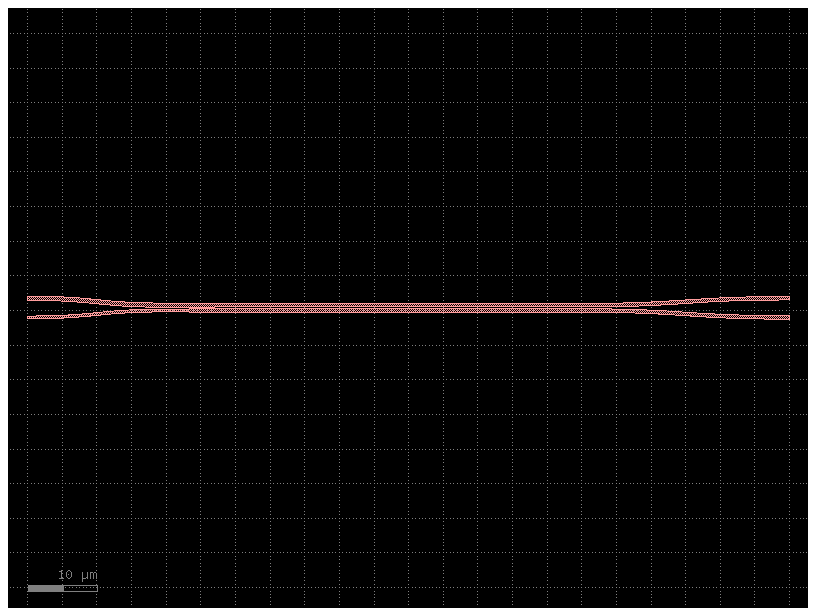

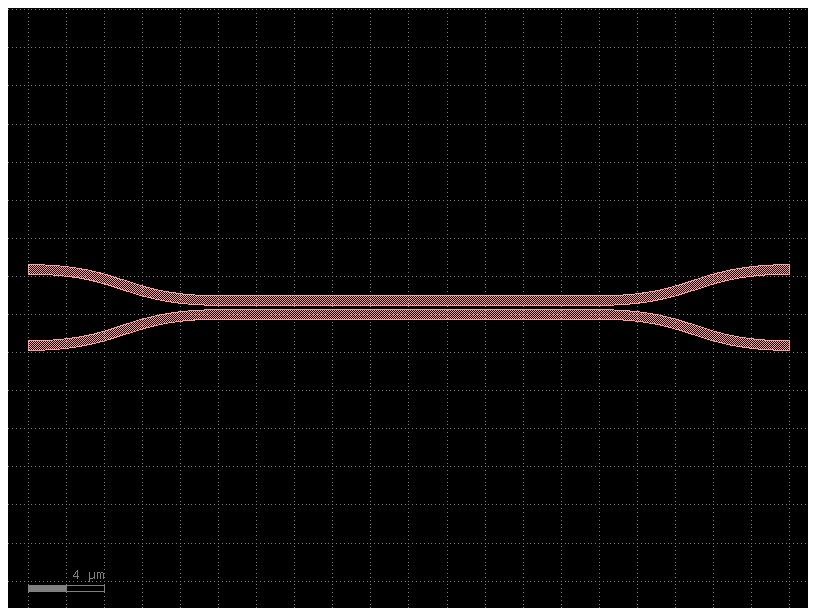

In [16]:
gf.c.coupler_adiabatic().plot()
gf.c.coupler().plot()

In [17]:
dc1 = gf.c.coupler(
    gap=0.250,
    length= 65,
    dy=127,
    dx=127, 
    cross_section='strip' 
)


dc2 = gf.c.coupler_tunable(
    gap=0.250, 
)
d.add_ref(dc1)
d.add_ref(dc2)

Unnamed_241: ports ['left', 'right', 'tuning_top', 'tuning_bottom'], KCell(name=coupler_tunable_gdsfactorypcomponentspquantumpcoupler_c_33264838, ports=['left', 'right', 'tuning_top', 'tuning_bottom'], pins=[], instances=['rectangle_gdsfactorypcomponentspshapesprectangle_S30_40_bc503d72_-30125_-20000', 'rectangle_gdsfactorypcomponentspshapesprectangle_S30_40_bc503d72_125_-20000', 'rectangle_gdsfactorypcomponentspshapesprectangle_S15_20_3fd3374e_-7500_21000', 'rectangle_gdsfactorypcomponentspshapesprectangle_S15_20_3fd3374e_-7500_-41000', 'rectangle_gdsfactorypcomponentspshapesprectangle_S30_10_8e0991d1_-60125_-5000', 'rectangle_gdsfactorypcomponentspshapesprectangle_S30_10_8e0991d1_30125_-5000', 'rectangle_gdsfactorypcomponentspshapesprectangle_S10_30_421ff531_-5000_41000', 'rectangle_gdsfactorypcomponentspshapesprectangle_S10_30_421ff531_-5000_-71000'], locked=True, kcl=DEFAULT)

In [18]:
d.show()

2025-11-20 10:20:44.155 | INFO     | kfactory.kcell:show:4059 - klive v0.4.1: Reloaded file '/home/sadilek/Dev/python-lab/build/oas/1612363911.oas'
